`Задание:`
`Основные цели этого задания:`

- Научиться строить архитектуру модели сверточной нейронной сети

- Научиться распознавать факты переобучения и недообучения модели

- Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров

- Научиться применять методы регуляризации для контроля переобучения

`Задача:`

Построить модель полносвязной и сверточной нейронной сети, которая будет отличать маффин от чихуахуа.\
Необходимо достичь точности (Accuracy) на тестовом датасете  > 85 % с использованием любой архитектуры нейронной сети

Ссылка на датасет: Muffin vs chihuahua 
https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification

`План решения:`

1. Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.

2. Проведите разбиение на тренировочные и тестовые данные.

3. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети без использования слоев свёртки. Функция должна возвращать скомпилированную модель и иметь названия fcc_nn(fully-connected_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

4. Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.

5. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, с использованием слоев свёртки, регуляризации, препроцессинга изображений(Rescaling). Функция должна возвращать скомпилированную модель и иметь названия conv_nn(convolutional_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

6. Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.

7. Напишите вывод о том, при какой архитектуре нейронной сети качество получилось лучше и почему. Также укажите в выводе, какие методы препроцессинга, регуляризации или гиперпараметры дали наибольший прирост к точности.

------------------------

In [1]:
import tensorflow as tf
import plotly.express as px
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Rescaling, Dropout, MaxPool2D
import matplotlib.image as img
import scipy

1. Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.

In [2]:
path_train = r'D:\H.W_3.5\train'
path_test = r'D:\H.W_3.5\test'

 ------------------------------
2. Проведите разбиение на тренировочные и тестовые данные.
 

- так как у нас 2 класса маффин и пёсель, решаем задачу бинарной классификации.

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path_train,
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=123
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    path_test,
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Found 1184 files belonging to 2 classes.
Using 236 files for validation.


- Подготовка данных

- Разделение на признаки и метки

In [4]:
train_features = train_ds.map(lambda x, y: x)
train_labels = train_ds.map(lambda x, y: y)

test_features = test_ds.map(lambda x, y: x)
test_labels = test_ds.map(lambda x, y: y)

- Объединение данных в тренировочный и тестовые наборы

In [5]:
train_dataset = tf.data.Dataset.zip((train_features, train_labels))

test_dataset = tf.data.Dataset.zip((test_features, test_labels))

 -------------------------------------------------
3. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети `без использования слоев свёртки`.\
 Функция должна возвращать скомпилированную модель и иметь `названия fcc_nn` (fully-connected_neural_network).\
 `Обучите модель нейронной сети`, измеряя `точность` на каждой эпохе с помощью тестовой выборки. 

In [6]:
def fcc_nn(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

- Получение объекта с размерностью из датасета

In [7]:
sample_element = next(iter(train_dataset))
input_shape = sample_element[0].shape
shape = input_shape[1:]

In [8]:

model = fcc_nn(input_shape=shape)
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
119/119 [==============================] - 11s 71ms/step - loss: 967.3004 - accuracy: 0.4967 - val_loss: 134.4902 - val_accuracy: 0.5254
Epoch 2/10
119/119 [==============================] - 9s 69ms/step - loss: 769.2411 - accuracy: 0.4999 - val_loss: 1732.7006 - val_accuracy: 0.6144
Epoch 3/10
119/119 [==============================] - 9s 70ms/step - loss: 743.3513 - accuracy: 0.5028 - val_loss: 94.4268 - val_accuracy: 0.4873
Epoch 4/10
119/119 [==============================] - 9s 65ms/step - loss: 504.9631 - accuracy: 0.5041 - val_loss: 197.8741 - val_accuracy: 0.5975
Epoch 5/10
119/119 [==============================] - 8s 63ms/step - loss: 385.9135 - accuracy: 0.4996 - val_loss: 62.1890 - val_accuracy: 0.4703
Epoch 6/10
119/119 [==============================] - 10s 76ms/step - loss: 294.4366 - accuracy: 0.4951 - val_loss: 117.5233 - val_accuracy: 0.5720
Epoch 7/10
119/119 [==============================] - 10s 72ms/step - loss: 254.9646 - accuracy: 0.5001 - val_loss: 3

 ----------------------------------------
4. Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.
 

In [9]:
df = pd.DataFrame(history.history)
df['epoch'] = range(1, len(df) + 1)

fig = px.line(df, x='epoch', y=['loss', 'val_loss'], title='Loss')
fig.update_xaxes(title='Epochs')
fig.update_yaxes(title='Loss')

fig.show()

fig = px.line(df, x='epoch', y=['accuracy', 'val_accuracy'], title='Accuracy')
fig.update_xaxes(title='Epochs')
fig.update_yaxes(title='Accuracy')

fig.show()

 ----------------------------------------
5. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, `с использованием` слоев `свёртки`, `регуляризации`, `препроцессинга` изображений (Rescaling).\
 Функция должна возвращать скомпилированную модель и иметь названия `conv_nn`(convolutional_neural_network).\
 Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

- `ImageDataGenerator`  используется для `генерации дополнительных образцов изображений` для обучения модели.
 позволяет генерировать разнообразные варианты изображений из исходных данных, что помогает улучшить обобщающую способность модели и предотвратить переобучение.

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    path_train,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 4733 images belonging to 2 classes.


- `создание генератора потоков` данных для обучающего набора изображений. Используем объект  `train_datagen`  для `преобразования` и `аугментации` изображений в режиме реального времени.

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = train_datagen.flow_from_directory(
    path_test,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 1184 images belonging to 2 classes.


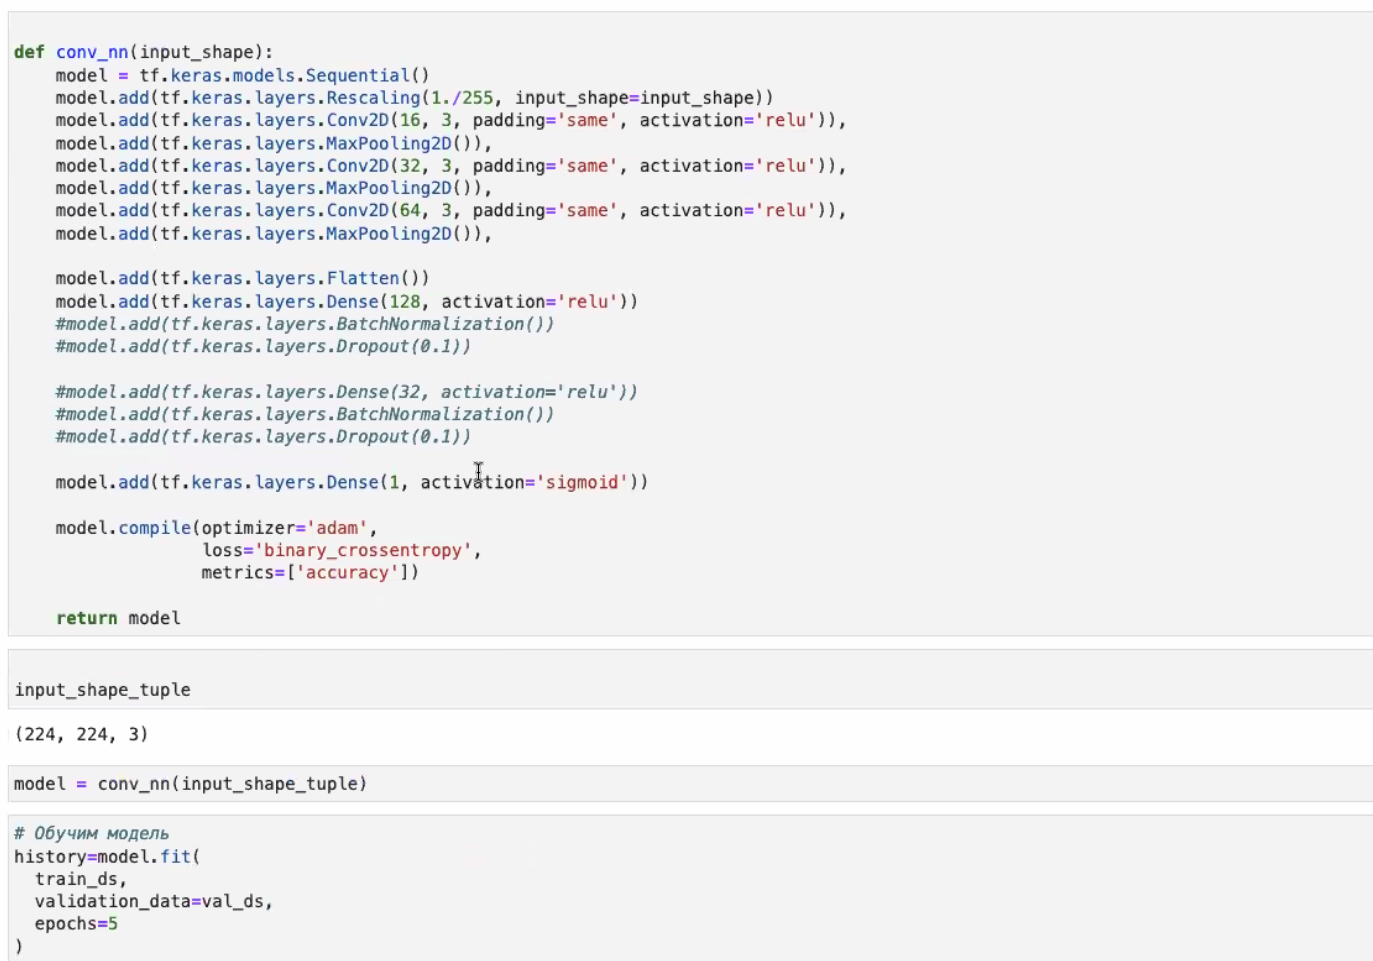

In [12]:
def conv_nn():
    cnn = Sequential()
    cnn.add(Conv2D(filters=32,
                                   kernel_size=3,
                                   activation='relu',
                                   input_shape=[64, 64, 3]))
    cnn.add(MaxPool2D(pool_size=2, strides=2))
    cnn.add(Conv2D(filters=32,
                                   kernel_size=3,
                                   activation='relu'))
    cnn.add(MaxPool2D(pool_size=2, strides=2))
    cnn.add(Flatten())
    cnn.add(Dense(units=128, activation='relu'))
    cnn.add(Dense(units=1, activation='sigmoid'))
    
    cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return cnn

In [13]:
model = conv_nn()
history = model.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
148/148 [==============================] - 27s 165ms/step - loss: 0.5341 - accuracy: 0.7222 - val_loss: 0.4934 - val_accuracy: 0.7796
Epoch 2/25
148/148 [==============================] - 28s 188ms/step - loss: 0.4123 - accuracy: 0.8109 - val_loss: 0.3348 - val_accuracy: 0.8666
Epoch 3/25
148/148 [==============================] - 24s 161ms/step - loss: 0.3538 - accuracy: 0.8483 - val_loss: 0.3137 - val_accuracy: 0.8767
Epoch 4/25
148/148 [==============================] - 22s 147ms/step - loss: 0.3178 - accuracy: 0.8603 - val_loss: 0.3132 - val_accuracy: 0.8691
Epoch 5/25
148/148 [==============================] - 23s 156ms/step - loss: 0.2873 - accuracy: 0.8813 - val_loss: 0.2736 - val_accuracy: 0.8910
Epoch 6/25
148/148 [==============================] - 23s 159ms/step - loss: 0.2606 - accuracy: 0.8863 - val_loss: 0.2987 - val_accuracy: 0.8590
Epoch 7/25
148/148 [==============================] - 25s 171ms/step - loss: 0.2462 - accuracy: 0.8944 - val_loss: 0.2263 - val_ac

KeyboardInterrupt: 

 ----------------------------------------
6. Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.
 

In [ ]:
df = pd.DataFrame(history.history)
df['epoch'] = range(1, len(df) + 1)

fig = px.line(df, x='epoch', y=['loss', 'val_loss'], title='Loss')
fig.update_xaxes(title='Epochs')
fig.update_yaxes(title='Loss')

fig.show()

fig = px.line(df, x='epoch', y=['accuracy', 'val_accuracy'], title='Accuracy')
fig.update_xaxes(title='Epochs')
fig.update_yaxes(title='Accuracy')

fig.show()

 ----------------------------------------

7. Напишите вывод о том, при какой архитектуре нейронной сети качество получилось лучше и почему. Также укажите в выводе, какие методы препроцессинга, регуляризации или гиперпараметры дали наибольший прирост к точности.

- При использовании препроцессинга получилось значительно увеличить качество модели!

        0.614 максимальный показатель метрики Accuracy без дополнительной обработки и слоев свертки.
        0.919 максимальный показатель метрики Accuracy с дополнительной обработкой и добавлением слоев свертки.

так на тренировочных данных, с помощью `ImageDataGenerator`  была произведена `генерация дополнительных образцов изображений`,\
что помогло улучшить обобщающую способность модели и предотвратить переобучение, `произведен рескейл` изображений и `их нормализация`,\
`добавлены` слои свертки `Conv2D` и `использован` `MaxPool2D` (слой пулинга), что позволило выделить наиболее активные (информативные) признаки в каждой области входных данных. Все эти методы позволили значительно увеличить производительность модели.

---------------------------------------------

- в дальнейшем попытаюсь применить уже готовую модель vgg16 или ResNet50. (пока не получилось)

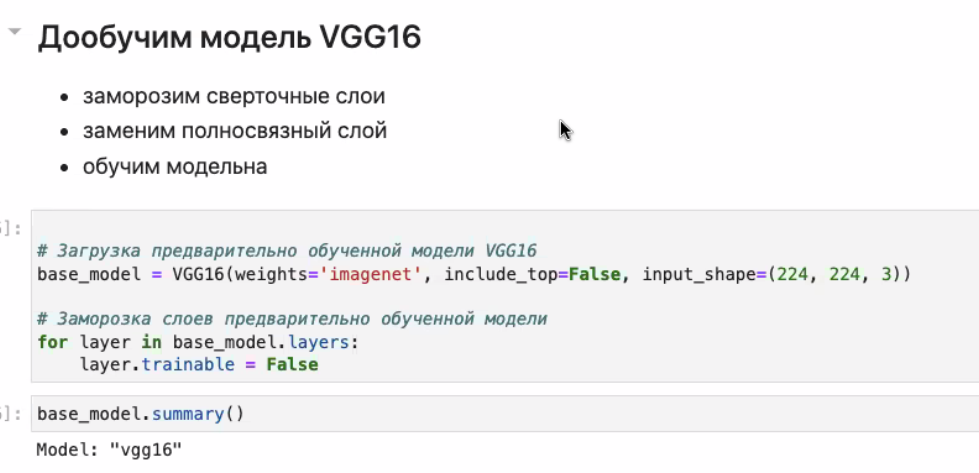

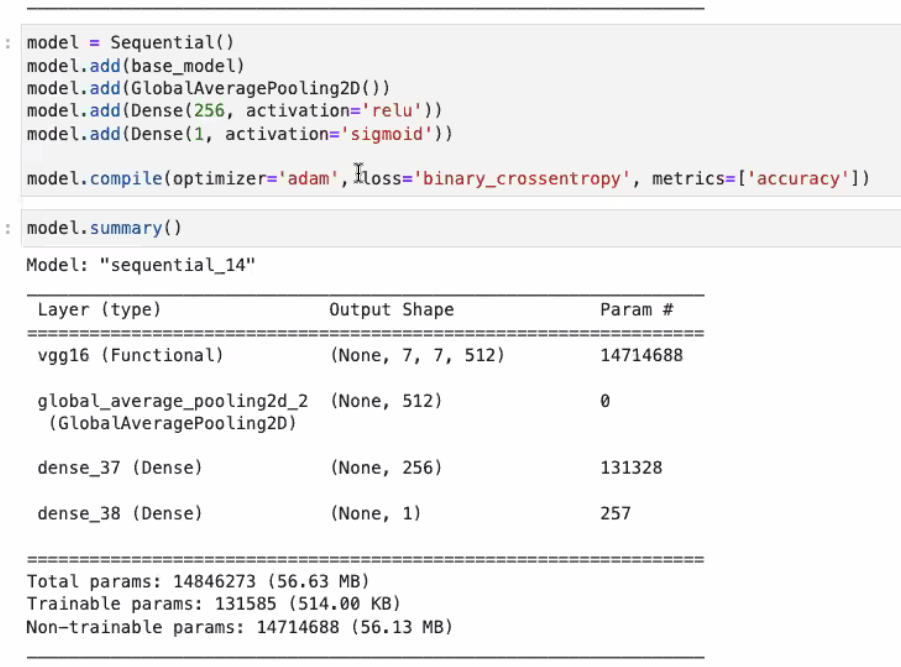

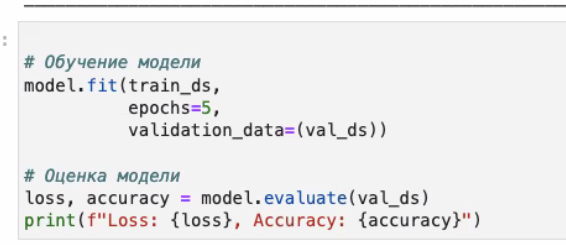

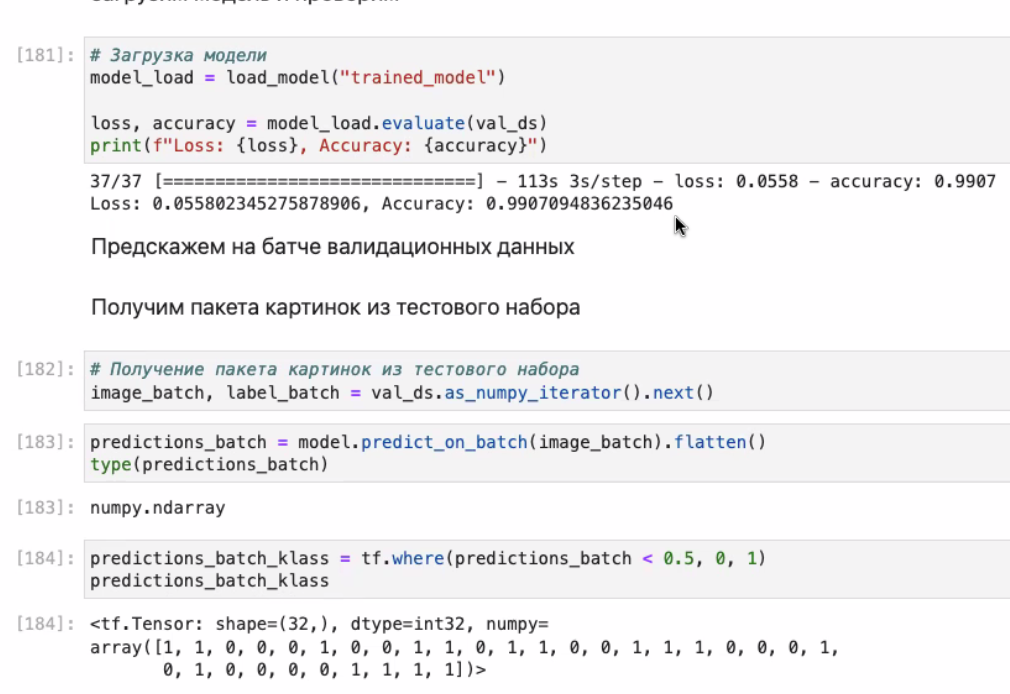

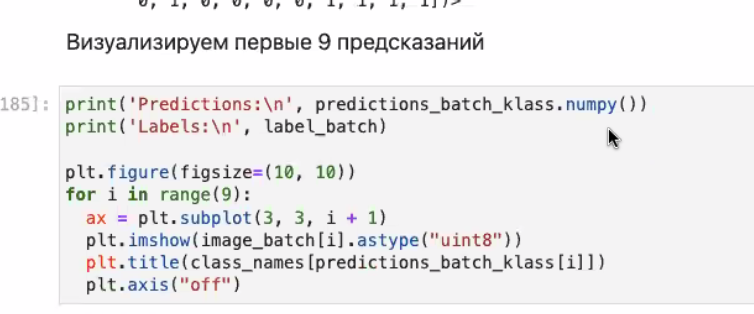

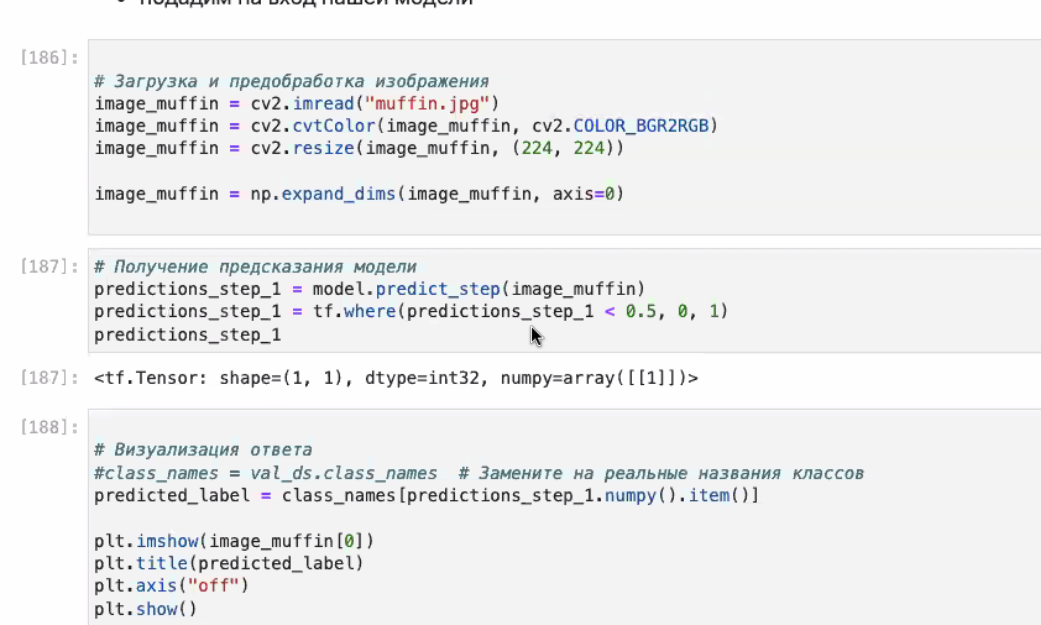

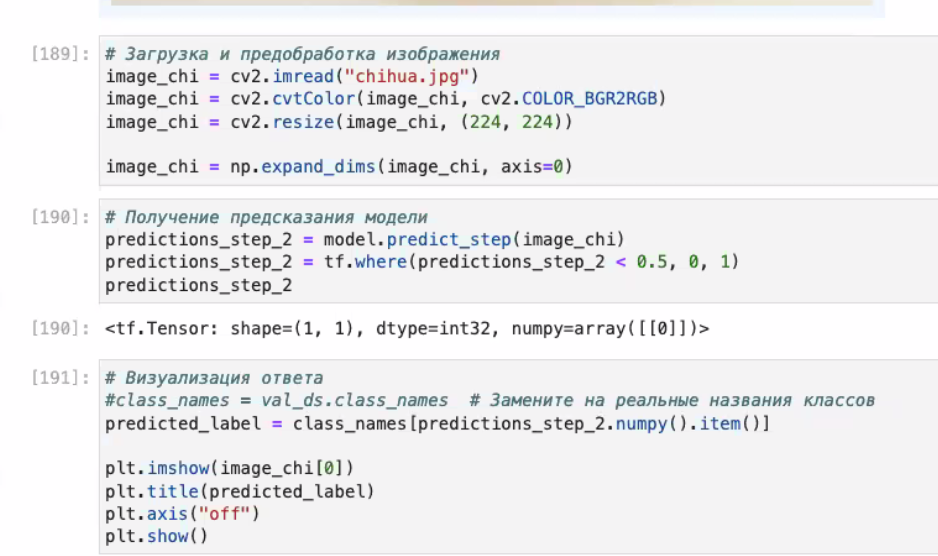

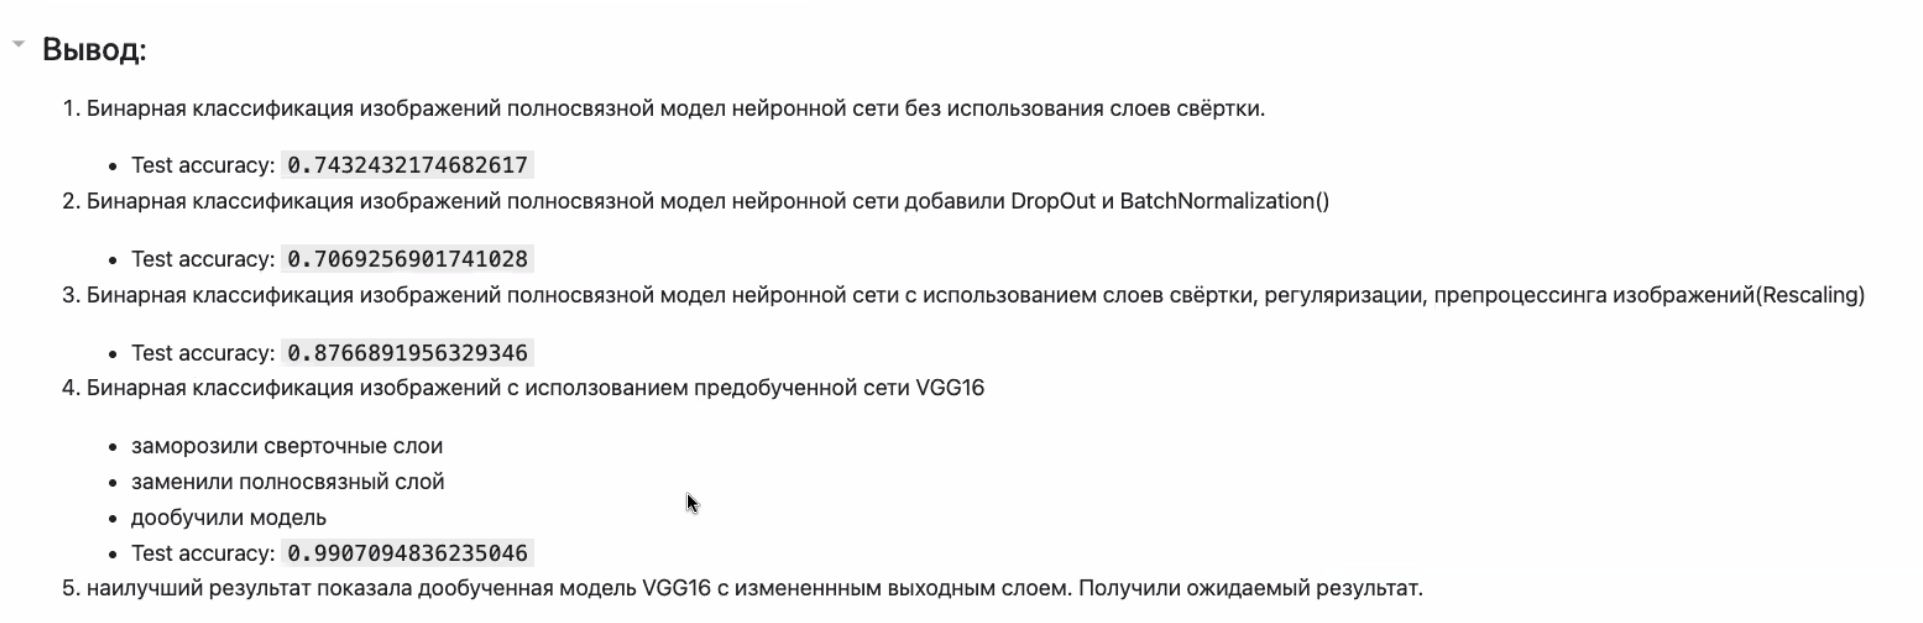

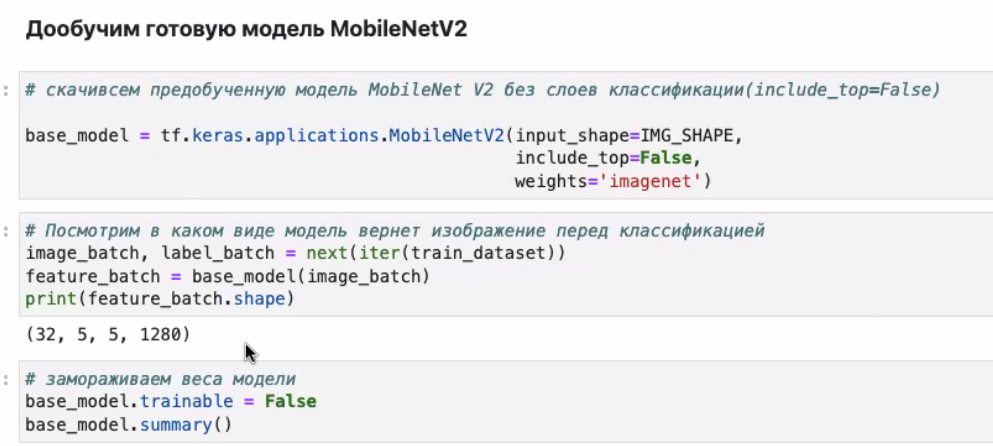

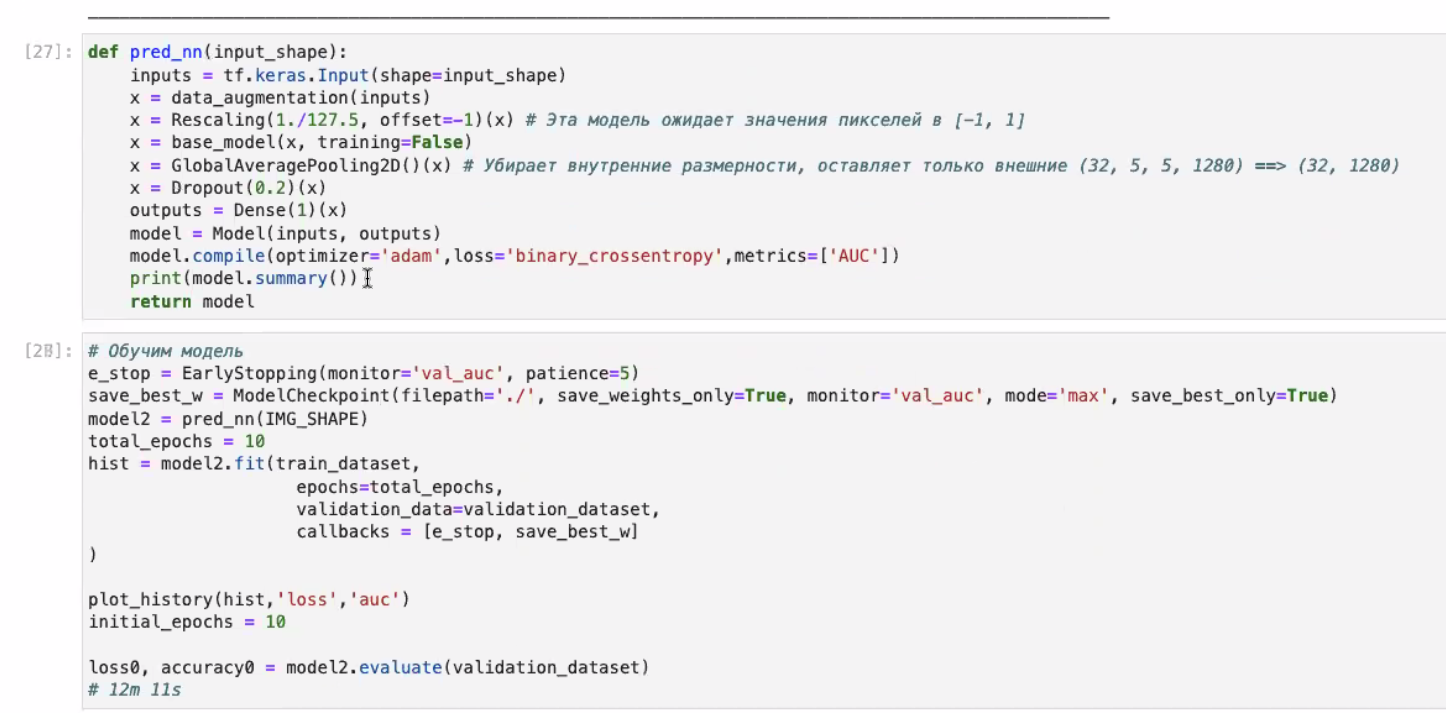

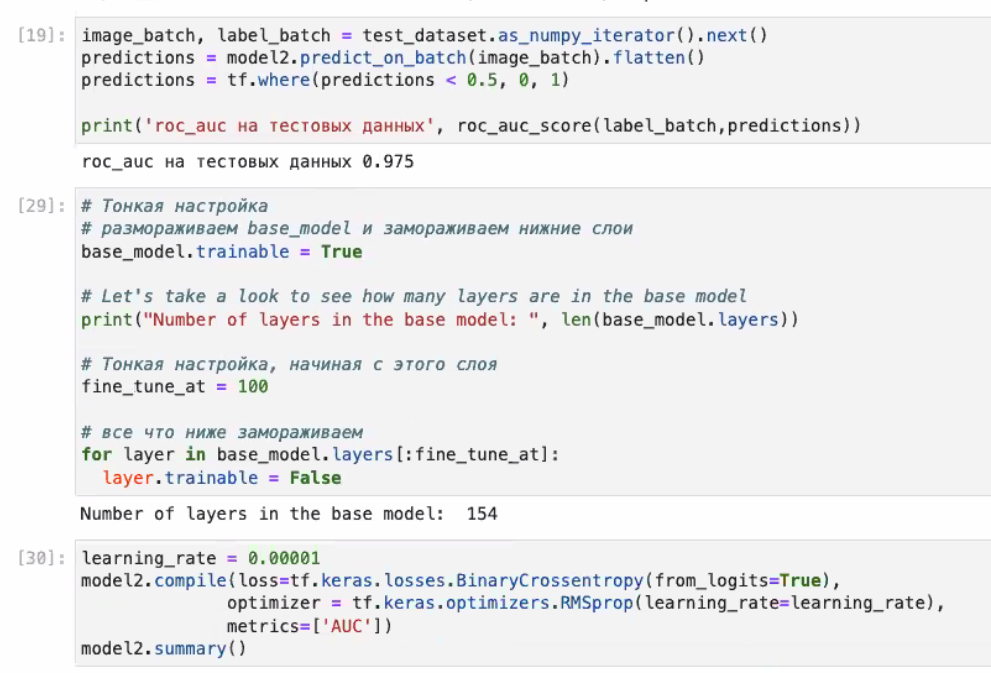

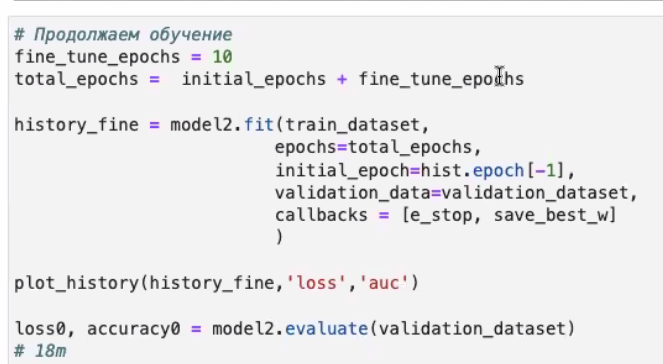

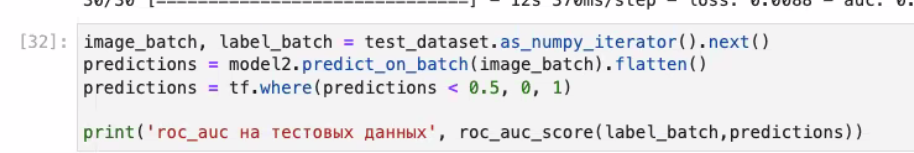

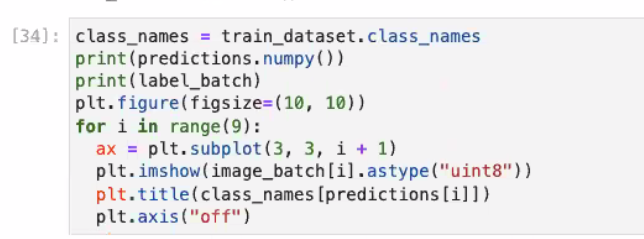